In [1]:
from bmtool.connectors import GaussianDropoff
import matplotlib.pyplot as plt
import numpy as np

send_to_report = False

max_conn_dist = 300
min_conn_dist = 16
PN2PN = GaussianDropoff(stdev=78, min_dist=0., max_dist=max_conn_dist,
                pmax=0.08, ptotal_dist_range=range(0, max_conn_dist),
                dist_type='cylindrical')

FSI2FSI = GaussianDropoff(
                stdev=126.77, min_dist=min_conn_dist, max_dist=max_conn_dist,
                ptotal=0.103, ptotal_dist_range=(min_conn_dist, 200.),
                dist_type='spherical')

LTS2LTS = GaussianDropoff(
                stdev=126.77, min_dist=min_conn_dist, max_dist=max_conn_dist,
                ptotal=0.15, ptotal_dist_range=(min_conn_dist, 50.),
                dist_type='spherical')

FSI2LTS = GaussianDropoff(
                stdev=126.77, min_dist=min_conn_dist, max_dist=max_conn_dist,
                ptotal=0.34, ptotal_dist_range=(min_conn_dist, 50.),
                dist_type='spherical')

LTS2FSI = GaussianDropoff(
                stdev=126.77, min_dist=min_conn_dist, max_dist=max_conn_dist,
                ptotal=0.53, ptotal_dist_range=(min_conn_dist, 50.),
                dist_type='spherical')

PN2FSI = GaussianDropoff(#from Holmgren et al 2003 
                stdev=99.84, min_dist=0., max_dist=max_conn_dist,
                pmax=0.71, ptotal_dist_range=range(0, max_conn_dist),
                dist_type='cylindrical')

FSI2PN = GaussianDropoff(#from Holmgren et al 2003 
                stdev=96, min_dist=0., max_dist=max_conn_dist,
                pmax=0.59, ptotal_dist_range=range(0, max_conn_dist),
                dist_type='spherical')

FSI2PN_BI = GaussianDropoff(#from Holmgren et al 2003 
                stdev=56, min_dist=0., max_dist=max_conn_dist,
                pmax=0.56, ptotal_dist_range=range(0, max_conn_dist),
                dist_type='spherical')

PN2LTS = GaussianDropoff(
                stdev=83.53, min_dist=0., max_dist=max_conn_dist,
                pmax=0.50, ptotal_dist_range=range(0, max_conn_dist),
                dist_type='cylindrical')

LTS2PN = GaussianDropoff(
                stdev=96.60, min_dist=min_conn_dist, max_dist=max_conn_dist,
                pmax=0.68, ptotal_dist_range=range(0, max_conn_dist),
                dist_type='spherical')

FSI2FSI_GAP = GaussianDropoff(
                mean=min_conn_dist, stdev=98.0,
                min_dist=min_conn_dist, max_dist=max_conn_dist,
                ptotal=0.267, ptotal_dist_range=(min_conn_dist, 200.),
                dist_type='spherical')

LTS2LTS_GAP = GaussianDropoff(
                mean=0., stdev=74.28,
                min_dist=min_conn_dist, max_dist=max_conn_dist,
                ptotal=0.85, ptotal_dist_range=(min_conn_dist, 50.),
                dist_type='spherical')



In [2]:
# Define the distance range
distances = np.linspace(0, max_conn_dist+ 100, 1000)

# Compute the probabilities
probabilities_PN2PN = PN2PN.probability(distances)
probabilities_PN2FSI = PN2FSI.probability(distances)
probabilities_PN2FSI_bi = FSI2PN_BI.probability(distances)
probabilities_PN2LTS = PN2LTS.probability(distances)

probabilities_FSI2PN = FSI2PN.probability(distances)
probabilities_FSI2FSI = FSI2FSI.probability(distances)
probabilities_FSI2LTS = FSI2LTS.probability(distances)

probabilities_LTS2PN = LTS2PN.probability(distances)
probabilities_LTS2FSI = LTS2FSI.probability(distances)
probabilities_LTS2LTS = LTS2LTS.probability(distances)

probabilities_FSI2FSI_gap = FSI2FSI_GAP.probability(distances)
probabilities_LTS2LTS_gap = LTS2LTS_GAP.probability(distances)


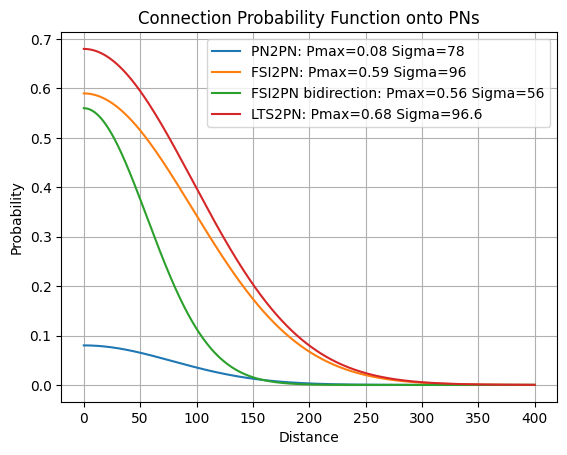

In [3]:
# Plot the results
plt.plot(distances, probabilities_PN2PN,label=f'PN2PN: Pmax={PN2PN.pmax:.2f} Sigma={PN2PN.stdev}')
plt.plot(distances, probabilities_FSI2PN,label=f'FSI2PN: Pmax={FSI2PN.pmax:.2f} Sigma={FSI2PN.stdev}')
plt.plot(distances,probabilities_PN2FSI_bi,label=f'FSI2PN bidirection: Pmax={FSI2PN_BI.pmax:.2f} Sigma={FSI2PN_BI.stdev}')
plt.plot(distances, probabilities_LTS2PN,label=f'LTS2PN: Pmax={LTS2PN.pmax:.2f} Sigma={LTS2PN.stdev}')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.title('Connection Probability Function onto PNs')
plt.grid(True)
plt.legend()
if send_to_report:
    plt.savefig('/home/gjgpb9/cortex_modeling/L2-3-Model/Write-Ups/Model_summary/figures/connections/onto-pn-functions.png',dpi=400)
    
plt.show()

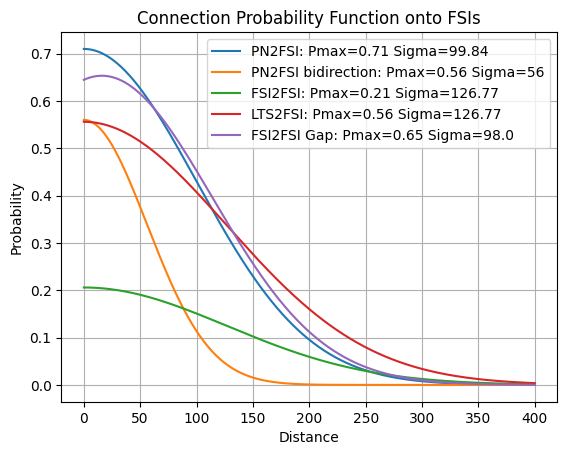

In [4]:
plt.plot(distances, probabilities_PN2FSI,label=f'PN2FSI: Pmax={PN2FSI.pmax:.2f} Sigma={PN2FSI.stdev}')
plt.plot(distances,probabilities_PN2FSI_bi,label=f'PN2FSI bidirection: Pmax={FSI2PN_BI.pmax:.2f} Sigma={FSI2PN_BI.stdev}')
plt.plot(distances, probabilities_FSI2FSI,label=f'FSI2FSI: Pmax={FSI2FSI.pmax:.2f} Sigma={FSI2FSI.stdev}')
plt.plot(distances, probabilities_LTS2FSI,label=f'LTS2FSI: Pmax={LTS2FSI.pmax:.2f} Sigma={LTS2FSI.stdev}')
plt.plot(distances,probabilities_FSI2FSI_gap,label=f'FSI2FSI Gap: Pmax={FSI2FSI_GAP.pmax:.2f} Sigma={FSI2FSI_GAP.stdev}')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.title('Connection Probability Function onto FSIs')
plt.grid(True)
plt.legend()
if send_to_report:
    plt.savefig('/home/gjgpb9/cortex_modeling/L2-3-Model/Write-Ups/Model_summary/figures/connections/onto-fsi-functions.png',dpi=400)
plt.show()

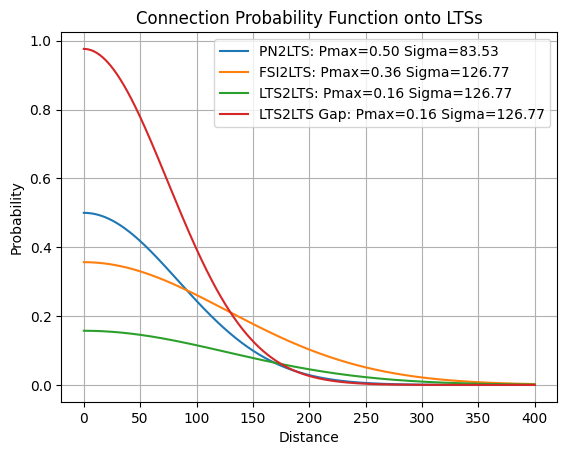

In [5]:
plt.plot(distances, probabilities_PN2LTS,label=f'PN2LTS: Pmax={PN2LTS.pmax:.2f} Sigma={PN2LTS.stdev}')
plt.plot(distances, probabilities_FSI2LTS,label=f'FSI2LTS: Pmax={FSI2LTS.pmax:.2f} Sigma={FSI2LTS.stdev}')
plt.plot(distances, probabilities_LTS2LTS,label=f'LTS2LTS: Pmax={LTS2LTS.pmax:.2f} Sigma={LTS2LTS.stdev}')
plt.plot(distances,probabilities_LTS2LTS_gap,label=f'LTS2LTS Gap: Pmax={LTS2LTS.pmax:.2f} Sigma={LTS2LTS.stdev}')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.title('Connection Probability Function onto LTSs')
plt.grid(True)
plt.legend()
if send_to_report:
    plt.savefig('/home/gjgpb9/cortex_modeling/L2-3-Model/Write-Ups/Model_summary/figures/connections/onto-lts-functions.png',dpi=400)
plt.show()